In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


**Loading Dataset**

In [3]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Copying the dataset

In [4]:
df1=df.copy()

# ** Data Preprocessing **

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df1.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Classifying data into numerical and categorical columns

In [7]:
data_numerical = df1[['age','trtbps','chol','thalachh','oldpeak']] 
data_categorical = df1[['sex','cp','fbs','restecg','exng','caa','thall','output']]

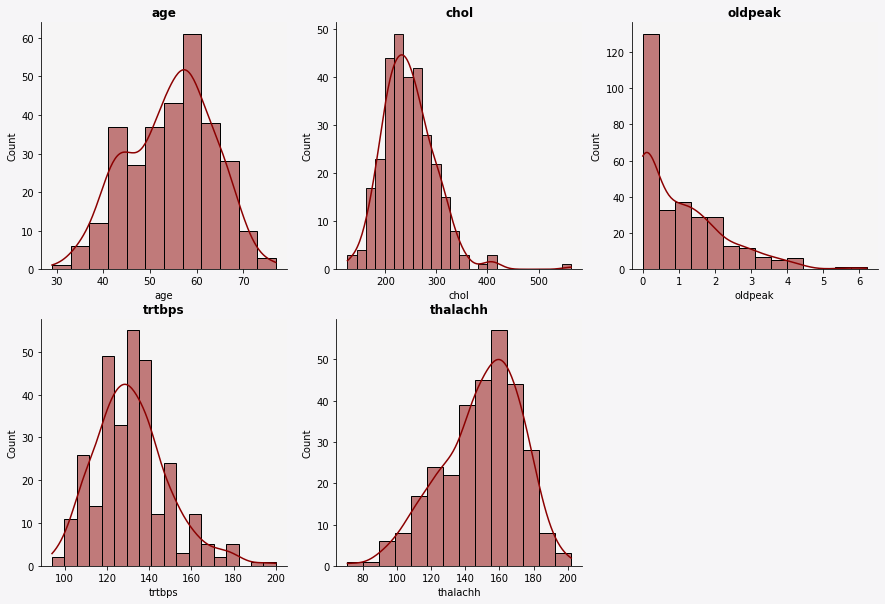

In [8]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.patch.set_facecolor('#f6f5f7')
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],x=data_numerical[idx],color='darkred',kde=True,alpha=0.5)
    ax[i%2,i//2].set_title(idx,fontweight='bold')
    ax[i%2,i//2].set_facecolor('#f6f5f5')
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

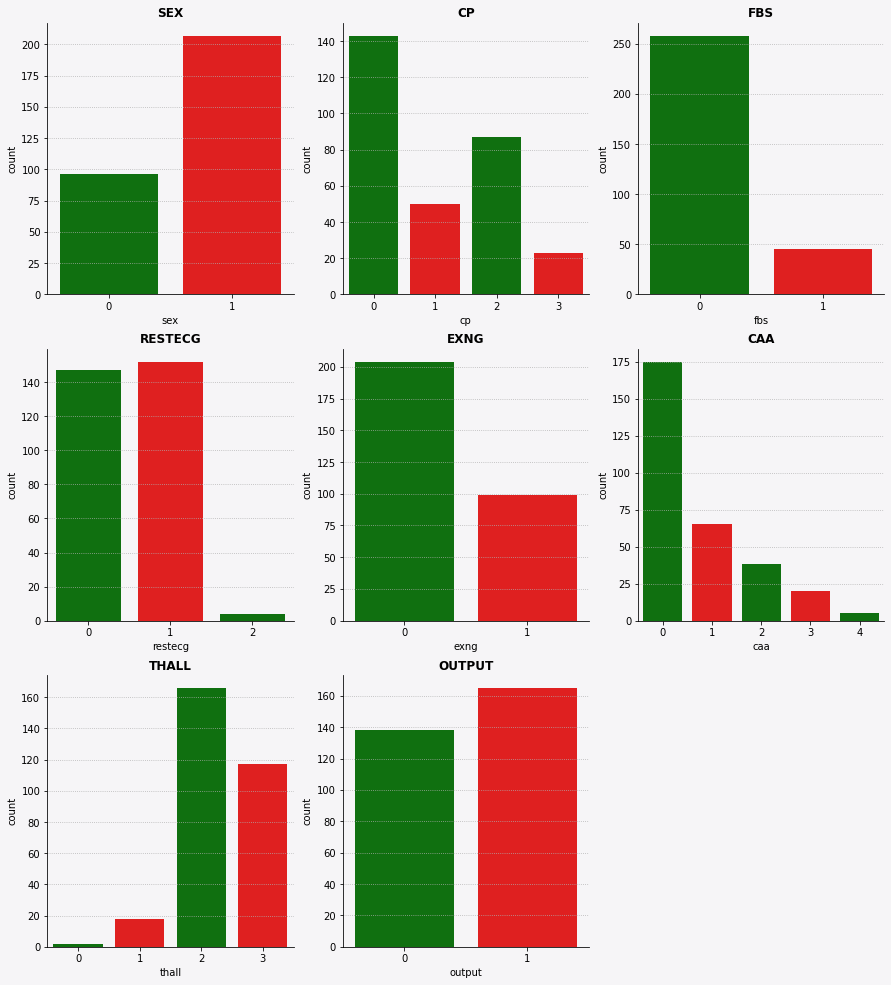

In [9]:
colors=['green','red']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=colors)

Observations :
1) Sex : The number of males are way more than the number of females in our data (male=1 , female = 0).

2) CP: People with type 0 chest pain (typical angina) are way more in number than the other groups. Type 3 cp (asymptomatic) are in the least ammount.

3) FBS: People with fasting blood sugar <120 are greater in number than people with blood sugar levels>120.

4) RESECG : 0 ( normal) and 1(having ST-T wave abnormality) are almost equal in number. This will be useful for predicting heart attack. Type 2 is almost negligible.

5) EXANG : People without exang (0) are almost double the amount of people with exang.

6) CA : People with blood vessels 0 occupy most amount of our data. More number of heart attacks were observed when CA=0 (previous analysis) .

7) THAL : People with thal 2 are more in number. No information was given about this(may not include this in predictions).

Outliers

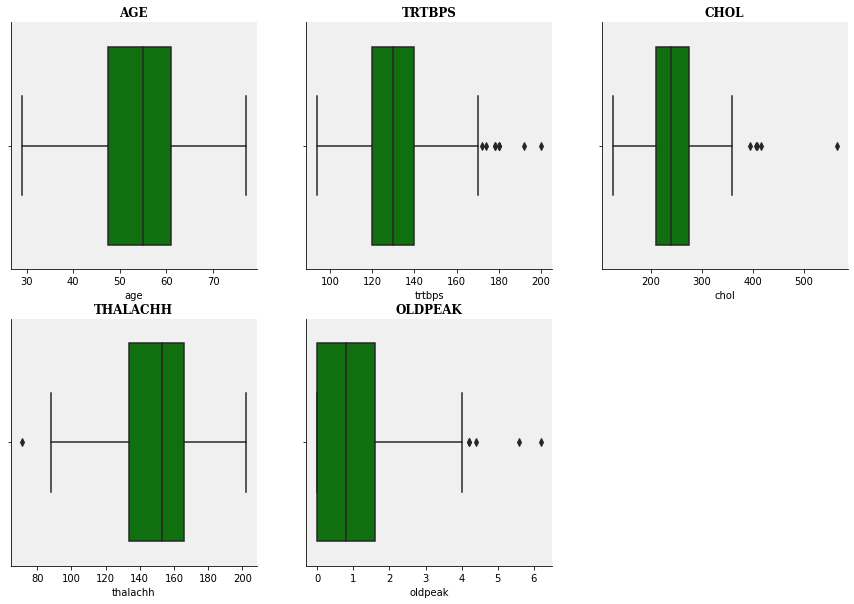

In [10]:
plt.figure(figsize=(15,10))
background_color = '#f0f0f0'
fig.patch.set_facecolor(background_color) 
for idx,val in enumerate(data_numerical.columns):
    ax=plt.subplot(2,3,idx+1)
    sns.boxplot(data_numerical[val],palette=colors)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)

##### Dropping slope and target 

In [11]:
data_target=df1['output']
df1.drop(columns=['slp','output'],inplace=True)

In [12]:
data_dummies=df1[['sex','cp','fbs','restecg','exng','caa','thall']]
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exng','caa','thall'])

In [13]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,0,2
3,56,1,1,120,236,0,1,178,0,0.8,0,2
4,57,0,0,120,354,0,1,163,1,0.6,0,2


In [14]:
df1.drop(columns=['sex','cp','fbs','restecg','exng','caa','thall'],inplace=True)
data=df1.merge(data_dummies,left_index=True, right_index=True,how='left')
df1.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,data_target,test_size=0.3,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
colors=['black','grey']
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap='rocket_r')
    metrics.plot_roc_curve(model, x_test, y_test)    

Testing Score 
 0.7472527472527473


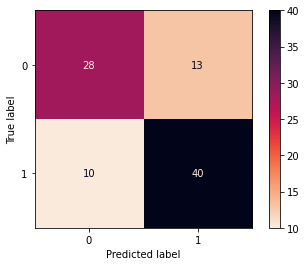

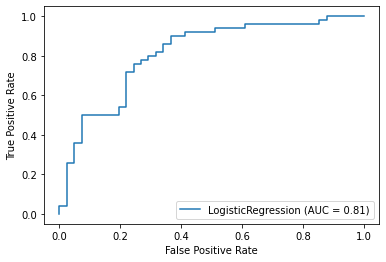

In [18]:
lg_reg=LogisticRegression()

Model(lg_reg)